# Student Activity: Returns Over Date Ranges

Harold's manager wants him to analyze the last 4 years of historical price data for Shopify, and then plot the daily returns over the last 1-, 2-, 3-, and 4-year periods. His manager wants to see the differences in average daily returns for each time period to determine whether a short- or long-term perspective should be used in prospecting Shopify as a potential investment opportunity.

Use the following instructions to help Harold analyze the last 4 years of Shopify stock data.

## Instructions

In [16]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import csv

### Read CSV in as DataFrame

In [17]:
# Set the path
data_path = Path('../Resources/shopify_stock_data.csv')

# Read in the CSV as a DataFrame
data_df = pd.read_csv(data_path)
data_df.head()

,date,close,volume,open,high,low
0,5/21/2015 16:00:00,31.25,211058,35.03,35.03,30.00
1,5/22/2015 16:00:00,34.94,224174,32.32,38.00,32.00
2,5/25/2015 16:00:00,37.26,105460,35.00,37.47,35.00
3,5/26/2015 16:00:00,36.92,75935,37.26,37.69,36.30
4,5/27/2015 16:00:00,34.50,135778,38.00,38.16,33.63


### View Summary Statistics

In [18]:
# Output summary statistics for csv data
data_df.describe()

,close,volume,open,high,low
count,1155.000000,1.155000e+03,1155.000000,1155.000000,1155.000000
mean,158.939030,2.447068e+05,158.782268,161.897212,155.624459
std,131.610276,3.170294e+05,131.419657,133.989183,128.882484
min,26.810000,4.341000e+03,27.030000,27.380000,25.850000
25%,47.220000,7.211100e+04,47.465000,48.730000,45.465000
50%,127.110000,2.031930e+05,126.940000,129.310000,123.750000
75%,203.415000,3.230220e+05,205.050000,209.340000,200.000000
max,541.490000,5.829405e+06,540.620000,544.000000,529.500000


### Drop Extra Columns

In [19]:
# Drop unnecessary columns
data_df_drop = data_df.drop(columns=['volume', 'high', 'low', 'open'])
data_df_drop

,date,close
0,5/21/2015 16:00:00,31.25
1,5/22/2015 16:00:00,34.94
2,5/25/2015 16:00:00,37.26
3,5/26/2015 16:00:00,36.92
4,5/27/2015 16:00:00,34.50
...,...,...
1150,12/20/2019 16:00:00,513.22
1151,12/23/2019 16:00:00,511.62
1152,12/24/2019 13:30:00,525.39
1153,12/27/2019 16:00:00,534.76


### Set Date as Index

In [20]:
# Set the date as the index to the DataFrame
data_df_drop_index = data_df_drop.set_index(pd.to_datetime(data_df_drop['date'], infer_datetime_format=True))
data_df_drop_index

,date,close
date,,
2015-05-21 16:00:00,5/21/2015 16:00:00,31.25
2015-05-22 16:00:00,5/22/2015 16:00:00,34.94
2015-05-25 16:00:00,5/25/2015 16:00:00,37.26
2015-05-26 16:00:00,5/26/2015 16:00:00,36.92
2015-05-27 16:00:00,5/27/2015 16:00:00,34.50
...,...,...
2019-12-20 16:00:00,12/20/2019 16:00:00,513.22
2019-12-23 16:00:00,12/23/2019 16:00:00,511.62
2019-12-24 13:30:00,12/24/2019 13:30:00,525.39


### Drop Extra Date Column

In [21]:
# Drop the extra date column
data_df_drop_index_drop2 = data_df_drop_index.drop(columns=['date'])
data_df_drop_index_drop2

,close
date,
2015-05-21 16:00:00,31.25
2015-05-22 16:00:00,34.94
2015-05-25 16:00:00,37.26
2015-05-26 16:00:00,36.92
2015-05-27 16:00:00,34.50
...,...
2019-12-20 16:00:00,513.22
2019-12-23 16:00:00,511.62
2019-12-24 13:30:00,525.39


### Calculate Daily Returns

In [22]:
# Calculate the daily returns over the last 4 years
daily_returns = data_df_drop_index_drop2.pct_change()
daily_returns

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547
...,...
2019-12-20 16:00:00,-0.005503
2019-12-23 16:00:00,-0.003118
2019-12-24 13:30:00,0.026915


### Use Indexing to Create Date Ranges

In [37]:
# Slice DataFrame into 1 year timeframe
daily_returns_1year = daily_returns['2015-01-01' : '2015-12-31']
daily_returns_1year

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547
...,...
2015-12-23 16:00:00,0.002033
2015-12-24 16:00:00,0.014203
2015-12-29 16:00:00,-0.005430


In [39]:
# Slice DataFrame into 2 year timeframe
daily_returns_2year = daily_returns['2015-01-01' : '2016-12-31']
daily_returns_2year

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547
...,...
2016-12-22 16:00:00,-0.006404
2016-12-23 16:00:00,0.030018
2016-12-28 16:00:00,0.049884


In [40]:
# Slice DataFrame into 3 year timeframe
daily_returns_3year = daily_returns['2015-01-01' : '2017-12-31']
daily_returns_3year

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547
...,...
2017-12-21 16:00:00,-0.011260
2017-12-22 16:00:00,-0.011089
2017-12-27 16:00:00,0.001591


In [41]:
# Slice DataFrame into 4 year timeframe
daily_returns_4year = daily_returns['2015-01-01' : '2018-12-31']
daily_returns_4year

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547
...,...
2018-12-21 16:00:00,-0.033122
2018-12-24 14:30:00,-0.029028
2018-12-27 16:00:00,0.115746


### Output Summary Statistics for 1 Year of Daily Returns 

In [42]:
# Display summary statistics for 1 year of Shopify stock data
daily_returns_1year.describe()

,close
count,153.000000
mean,0.001727
std,0.042697
min,-0.098644
25%,-0.020883
50%,0.000282
75%,0.022599
max,0.240483


### Output Summary Statistics for 2 Years of Daily Returns 

In [43]:
# Display summary statistics for 2 years of Shopify stock data
daily_returns_2year.describe()

,close
count,403.000000
mean,0.002094
std,0.034181
min,-0.098644
25%,-0.015946
50%,0.001742
75%,0.018071
max,0.240483


### Output Summary Statistics for 3 Years of Daily Returns

In [44]:
# Display summary statistics for 3 years of Shopify stock data
daily_returns_3year.describe()

,close
count,653.000000
mean,0.002650
std,0.031840
min,-0.114962
25%,-0.014004
50%,0.002639
75%,0.018766
max,0.240483


### Output Summary Statistics for 4 Years of Daily Returns

In [45]:
# Display summary statistics for 4 years of Shopify stock data
daily_returns_4year.describe()

,close
count,904.000000
mean,0.002516
std,0.032536
min,-0.127650
25%,-0.014494
50%,0.003923
75%,0.019827
max,0.240483


### Plot 1 Year of Daily Returns 

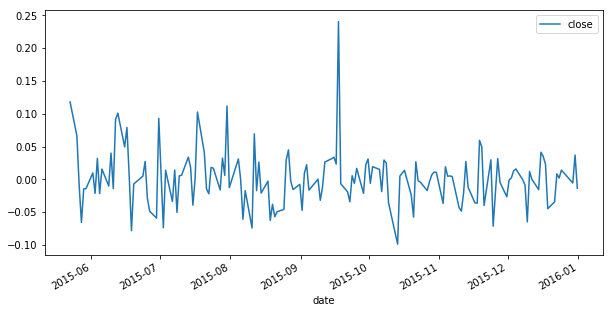

In [49]:
# Display chart of 1 year's worth of daily Shopify returns
daily_returns_1year.plot(figsize=(10, 5))

### Plot 2 Years of Daily Returns

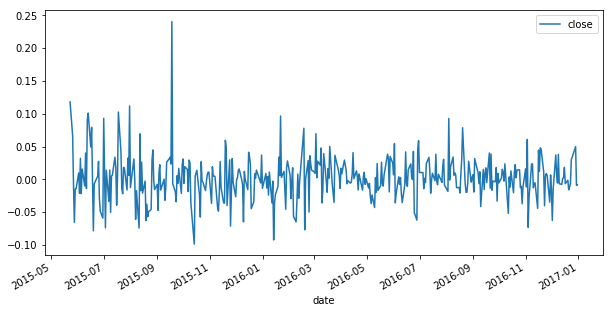

In [50]:
# Display chart of 2 year's worth of daily Shopify returns
daily_returns_2year.plot(figsize=(10, 5))

### Plot 3 Years of Daily Returns

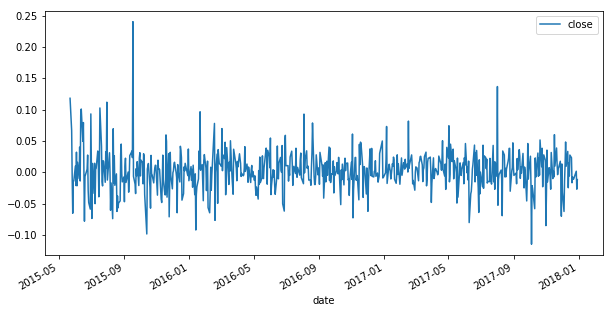

In [51]:
# Display chart of 3 year's worth of daily Shopify returns
daily_returns_3year.plot(figsize=(10, 5))

### Plot 4 Years of Daily Returns

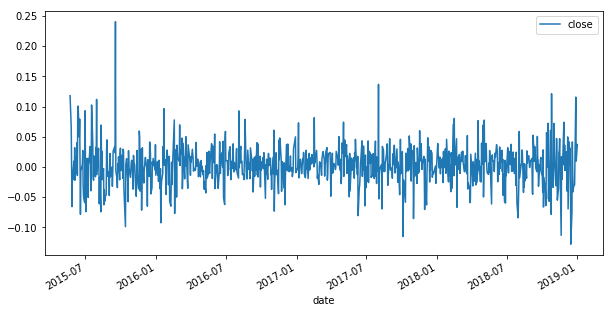

In [52]:
# Display chart of 4 year's worth of daily Shopify returns
daily_returns_4year.plot(figsize=(10, 5))

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 0.001727; 0.002094; 0.002650; 0.002516
    
    
2. What insights could this provide in regards to wanting to trade Shopify stock in the long-term vs. short-term? 

    * Less likely to make money in the short-term, but could in the long-term. Buy and hold could be the best approach.